## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

<img src="example.png" alt="Pizza-1" style="width: 800px;"/>



Fig : Bishop, Pattern Recognition and ML

In [1]:
import matplotlib.pyplot as plt

In [31]:
import numpy as np

In [8]:
import cv2

In [23]:
im =  cv2.imread('elephant.jpg') #Reads an image into BGR Format

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)
#print(im)

(330, 500, 3)


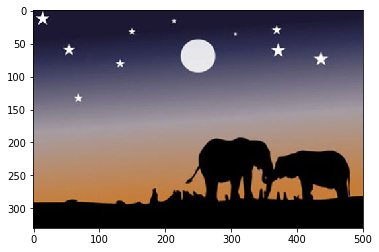

In [24]:
plt.imshow(im) # as RGB Format
plt.show()


In [109]:
256*256*256

3*4=12

16777216

In [18]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)
print(all_pixels)

(165000, 3)
[[23 19 46]
 [25 21 48]
 [28 24 51]
 ...
 [ 0  0  0]
 [ 0  0  0]
 [ 0  0  0]]


In [20]:
from sklearn.cluster import KMeans

In [123]:
dominant_colors = 8


km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [124]:
print(km.labels_[20:])

[1 1 1 ... 3 3 3]


In [125]:
centers = km.cluster_centers_
print(centers)

[[167.76710942 148.90350825 144.90002383]
 [ 31.75087115  28.11901206  55.19402642]
 [ 92.28302008  89.14606453 113.4818141 ]
 [  1.3577387    0.75814562   1.10129342]
 [189.27578254 132.16107319  82.36963992]
 [232.877429   232.57025411 236.83931241]
 [ 56.59934469  56.03859764  88.80806029]
 [126.74417307 120.82320853 138.35773618]]


In [126]:
centers = np.array(centers,dtype='uint8')

In [127]:
print(centers)

[[167 148 144]
 [ 31  28  55]
 [ 92  89 113]
 [  1   0   1]
 [189 132  82]
 [232 232 236]
 [ 56  56  88]
 [126 120 138]]


### Plot what all colors are these ?

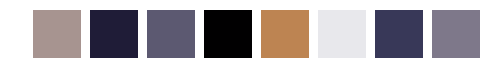

In [130]:
i = 1

plt.figure(0,figsize=(8,2))


colors = []

for each_col in centers:
    plt.subplot(2,8,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()


## Segmenting Our Original Image

In [116]:
im.shape

(330, 500, 3)

In [117]:
new_img = np.zeros((im.shape[0]*im.shape[1],3),dtype='uint8')

print(new_img.shape)


(165000, 3)


In [118]:
colors

[array([38, 35, 64], dtype=uint8),
 array([174, 145, 128], dtype=uint8),
 array([ 98,  94, 117], dtype=uint8),
 array([1, 0, 1], dtype=uint8)]

In [119]:
km.labels_[2]

0

In [120]:
colors[1]

array([174, 145, 128], dtype=uint8)

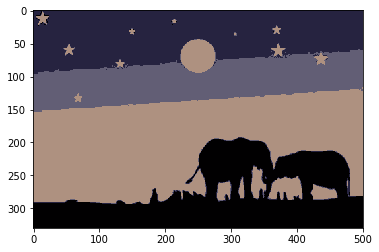

In [121]:

for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((330,500,3))
plt.imshow(new_img)
plt.show()
    
    
